In [ ]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima.model import ARIMA
# import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
# from pmdarima import auto_arima

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [3]:

# Load the data from the .txt file
df = pd.read_csv(
    'household_power_consumption.txt', 
    sep=';',                      
    parse_dates=[[0, 1]],         
    dayfirst=True,               
    na_values='?',                
    infer_datetime_format=True   
)

df.rename(columns={'Date_Time': 'datetime'}, inplace=True)
df.datetime = pd.to_datetime(df['datetime'])
df.index = df.datetime
del df['datetime']



C:\Users\sreeja.debray\AppData\Local\Temp\ipykernel_30388\1813855587.py:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(
C:\Users\sreeja.debray\AppData\Local\Temp\ipykernel_30388\1813855587.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(


In [4]:
#check the data
print(df.head())
print(f"********** Data Types ************** /n{df.dtypes}")

                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

In [5]:
#Check for missing values
df.isnull().values.any()
print(df.isnull().sum())
print((df.isnull().sum() / len(df)) * 100)

# check missing time values
time_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq="T")
missing_timestamps = time_range.difference(df.index)
print("Missing minute timestamps:", missing_timestamps) # So no missing time values




Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64
Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
dtype: float64
Missing minute timestamps: DatetimeIndex([], dtype='datetime64[ns]', freq='min')


C:\Users\sreeja.debray\AppData\Local\Temp\ipykernel_30388\2641125643.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq="T")


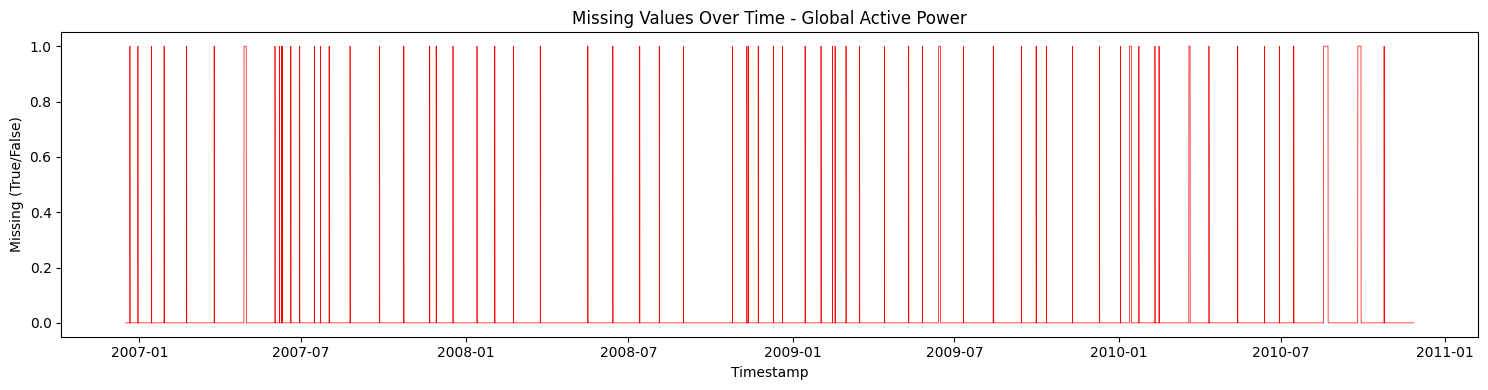

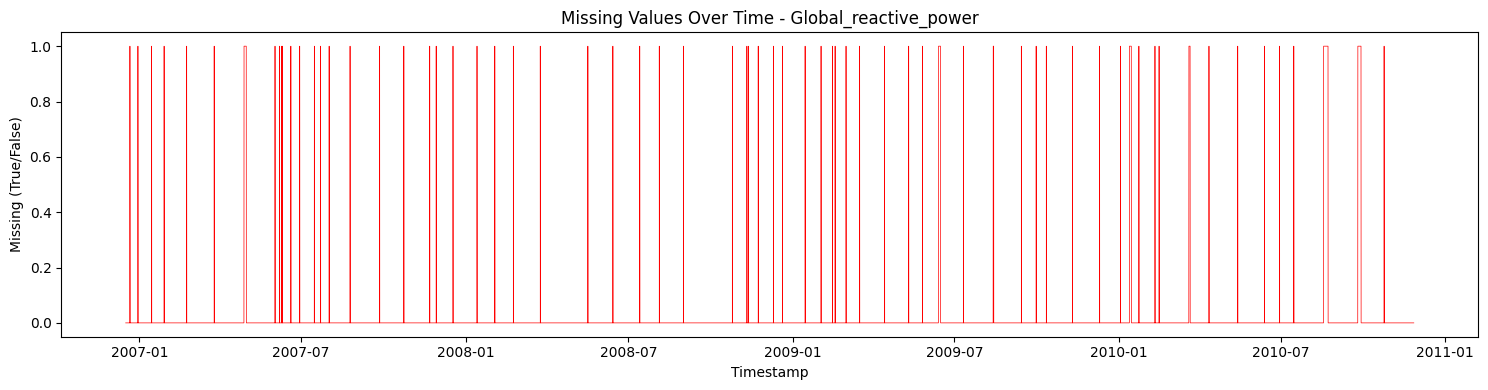

In [6]:
#Visualise missing data

# Plot a boolean mask of missing values for a selected column
missing_mask = df['Global_active_power'].isnull()
plt.figure(figsize=(15, 4))
plt.plot(df.index, missing_mask, color='red', lw=0.5)
plt.title("Missing Values Over Time - Global Active Power")
plt.ylabel("Missing (True/False)")
plt.xlabel("Timestamp")
plt.tight_layout()
plt.show()


missing_mask = df['Global_reactive_power'].isnull()
plt.figure(figsize=(15, 4))
plt.plot(df.index, missing_mask, color='red', lw=0.5)
plt.title("Missing Values Over Time - Global_reactive_power")
plt.ylabel("Missing (True/False)")
plt.xlabel("Timestamp")
plt.tight_layout()
plt.show()




In [7]:
#Handling missing values
df_filled = df.ffill()
print("Original missing values:")
print(df.isnull().sum())

print("\nAfter forward fill:")
print(df_filled.isnull().sum())

Original missing values:
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

After forward fill:
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [35]:
df_daily = df_filled['Global_active_power'].resample('D').mean()
df_hourly = df_filled['Global_active_power'].resample('H').mean()
df_monthly = df_filled['Global_active_power'].resample('M').mean()

C:\Users\sreeja.debray\AppData\Local\Temp\ipykernel_30388\2783191138.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df_filled['Global_active_power'].resample('H').mean()
C:\Users\sreeja.debray\AppData\Local\Temp\ipykernel_30388\2783191138.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_filled['Global_active_power'].resample('M').mean()


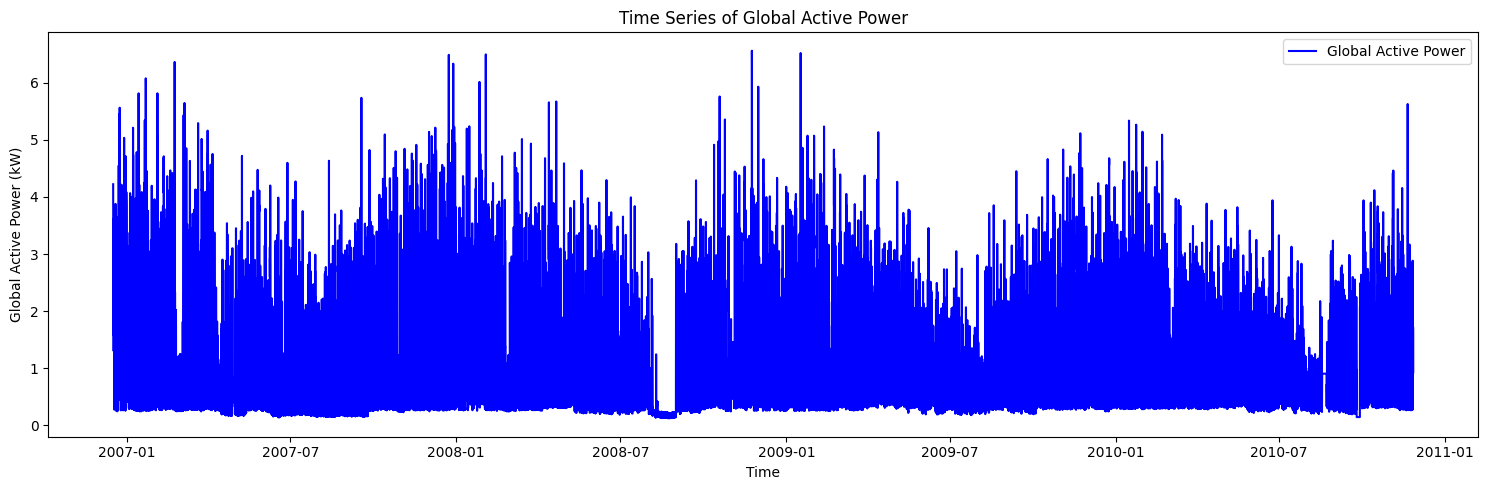

In [36]:
#Visualise ts for Global active power

plt.figure(figsize=(15, 5))
plt.plot(df_hourly.index, df_hourly, label='Global Active Power', color='blue')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.title('Time Series of Global Active Power')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\sreeja.debray\AppData\Local\Temp\ipykernel_30388\4294202282.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\sreeja.debray\OneDrive - Accenture\Training\Projects\Time Series\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


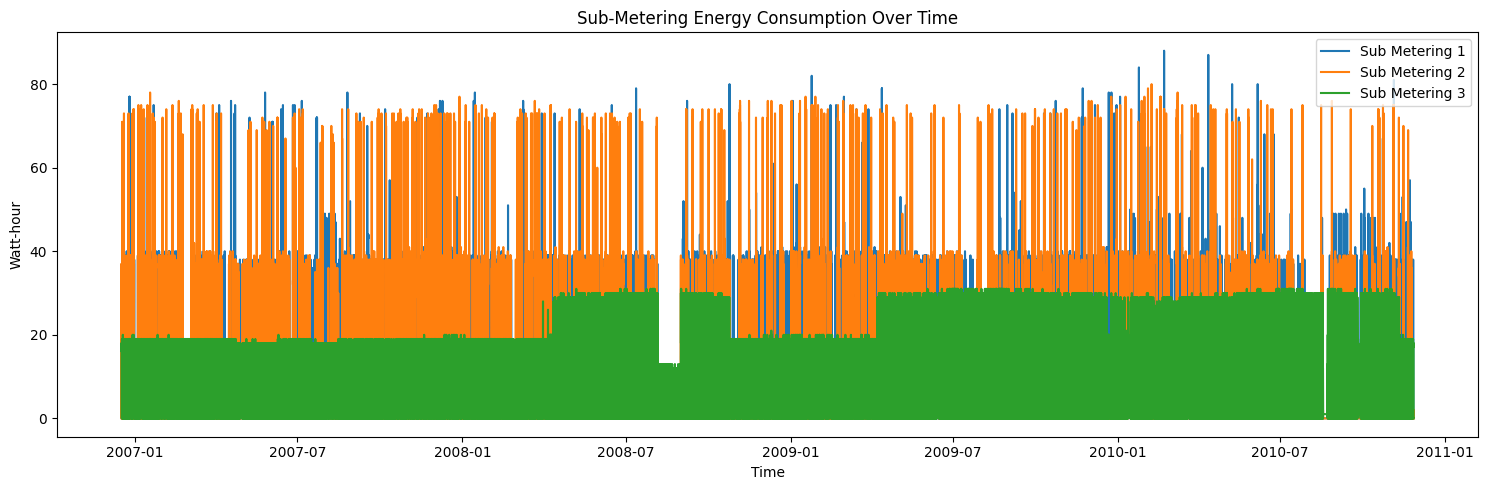

In [9]:
plt.figure(figsize=(15, 5))
plt.plot(df_filled.index, df_filled['Sub_metering_1'], label='Sub Metering 1')
plt.plot(df_filled.index, df_filled['Sub_metering_2'], label='Sub Metering 2')
plt.plot(df_filled.index, df_filled['Sub_metering_3'], label='Sub Metering 3')
plt.xlabel('Time')
plt.ylabel('Watt-hour')
plt.title('Sub-Metering Energy Consumption Over Time')
plt.legend()
plt.tight_layout()
plt.show()


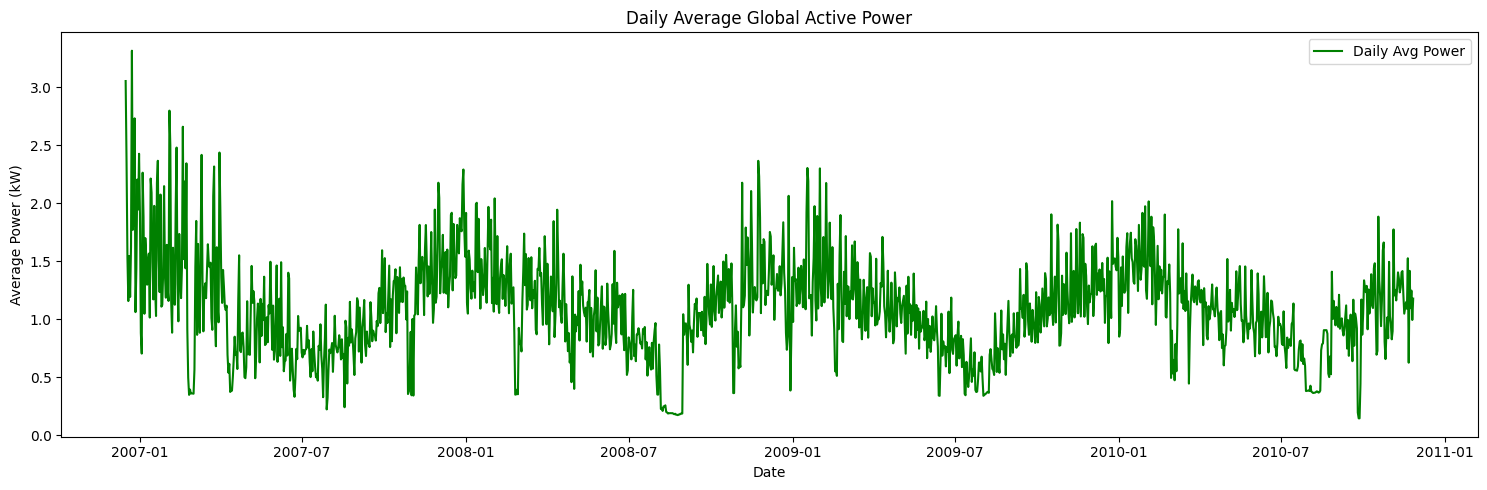

In [37]:


plt.figure(figsize=(15, 5))
plt.plot(df_daily.index, df_daily, label='Daily Avg Power', color='green')
plt.xlabel('Date')
plt.ylabel('Average Power (kW)')
plt.title('Daily Average Global Active Power')
plt.legend()
plt.tight_layout()
plt.show()


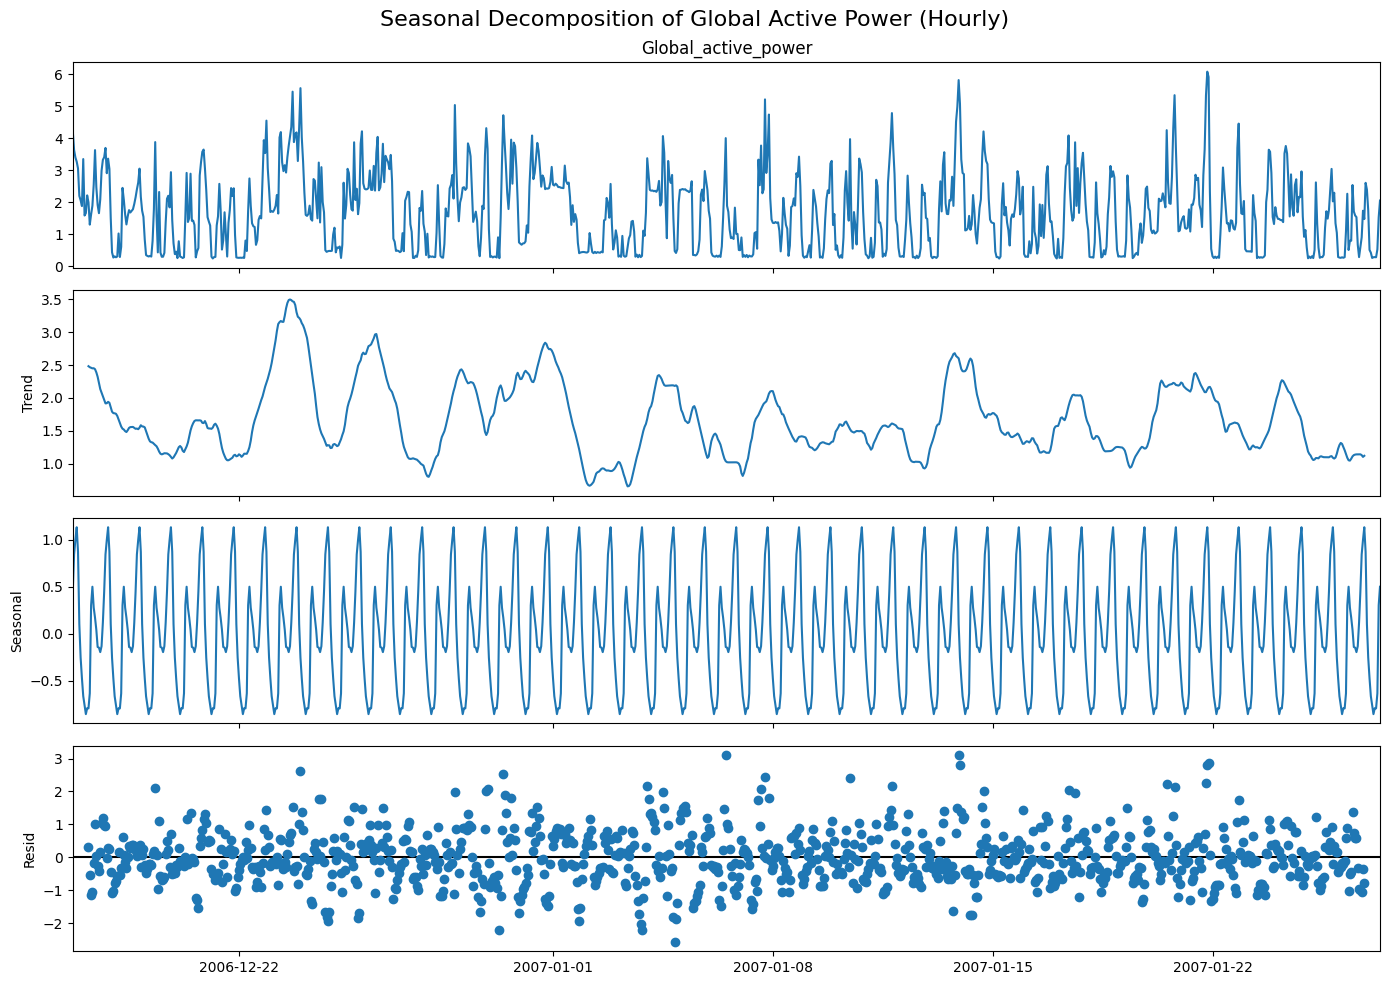

In [47]:

# Decompose the series
decomposition = seasonal_decompose(df_hourly[:1000], model='additive')  # or 'multiplicative'

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Seasonal Decomposition of Global Active Power (Hourly)', fontsize=16)
plt.tight_layout()
plt.show()


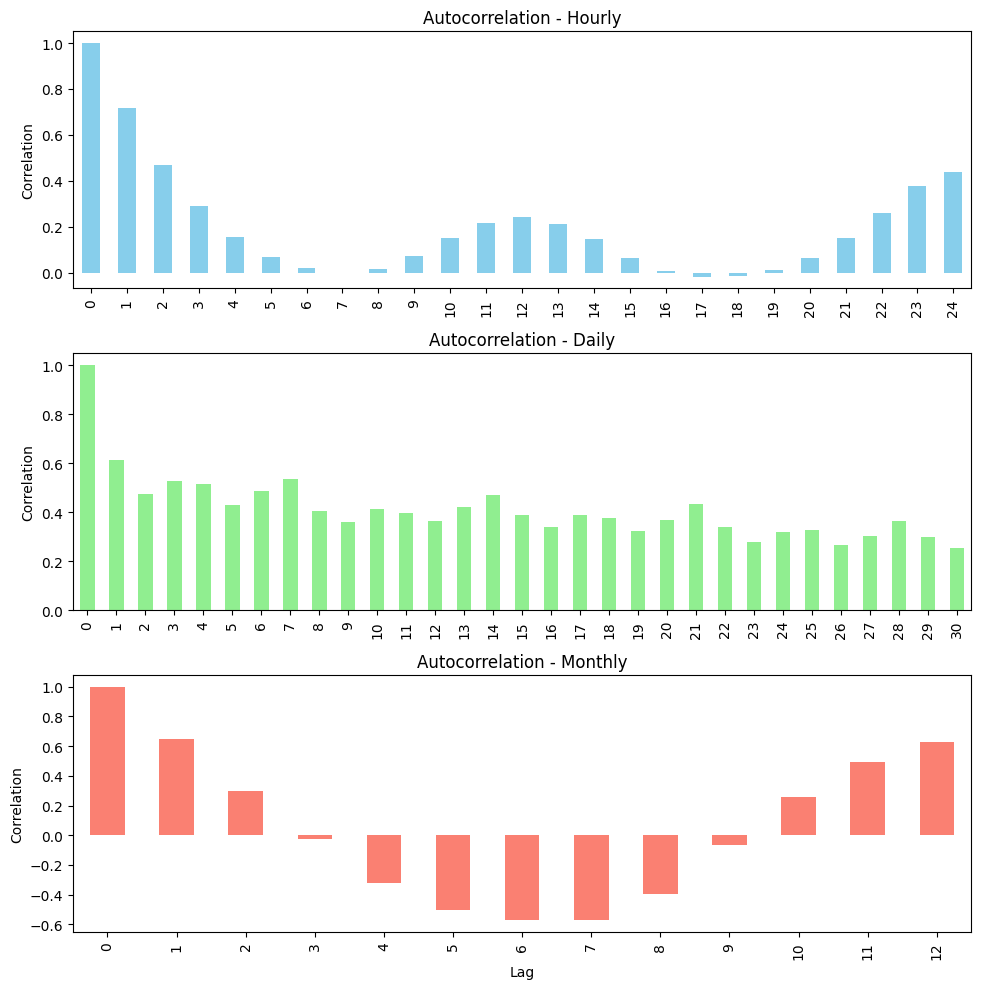

In [17]:
#ACF plot for diff resampled data

# autocorr_daily = pd.Series(acf(df_hourly, nlags=30))
# autocorr_hourly = pd.Series(acf(df_daily, nlags=24))
# autocorr_monthly = pd.Series(acf(df_monthly, nlags=12))

# plt.figure(figsize=(12, 6))
# autocorr_hourly.plot(kind='bar', title="Autocorrelation of Hourly Series")
# autocorr_daily.plot(kind='bar', title="Autocorrelation of Daily Series")
# autocorr_monthly.plot(kind='bar', title="Autocorrelation of Monthly Series")
# plt.xlabel("Lag")
# plt.ylabel("Correlation")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


autocorr_hourly = pd.Series(acf(df_hourly, nlags=24))
autocorr_daily = pd.Series(acf(df_daily, nlags=30))
autocorr_monthly = pd.Series(acf(df_monthly, nlags=12))

fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=False)

autocorr_hourly.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Autocorrelation - Hourly')
axes[0].set_ylabel('Correlation')

autocorr_daily.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Autocorrelation - Daily')
axes[1].set_ylabel('Correlation')

autocorr_monthly.plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('Autocorrelation - Monthly')
axes[2].set_xlabel('Lag')
axes[2].set_ylabel('Correlation')

plt.tight_layout()
plt.show()

In [55]:
#Train test split

train_size = len(df_hourly) - 48
train, test = df_hourly[:train_size], df_hourly[train_size:]

In [56]:
#Basic ARIMA model
model = ARIMA(train, order=(1,1,1))  
model_fit = model.fit()

c:\Users\sreeja.debray\OneDrive - Accenture\Training\Projects\Time Series\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


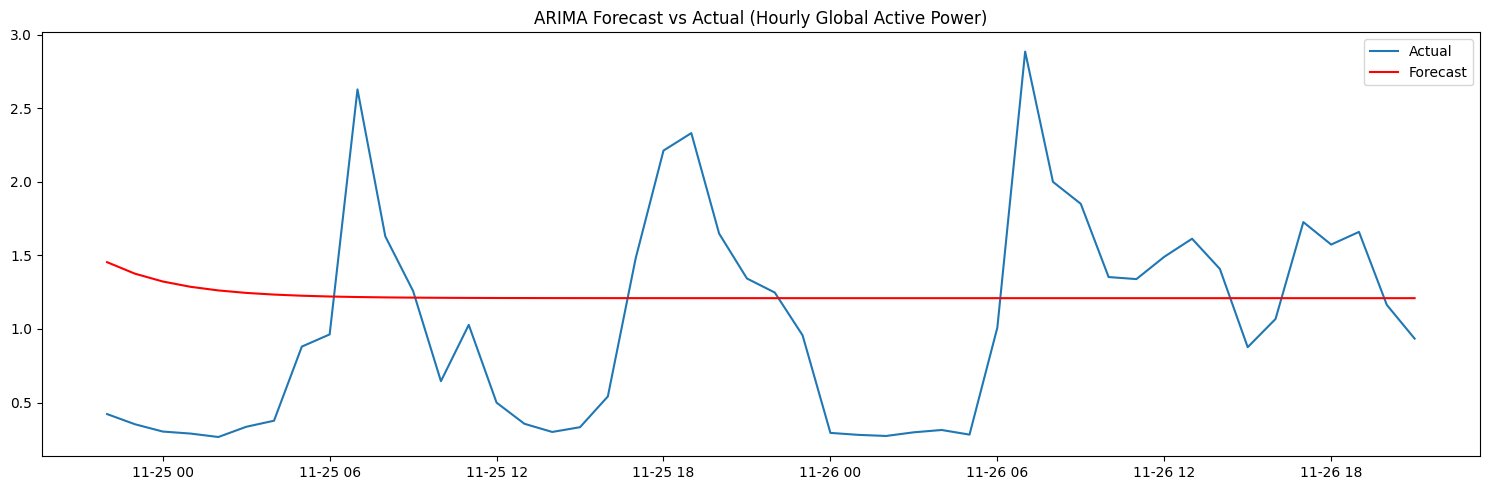

In [57]:
#Forecasting
forecast = model_fit.forecast(steps=len(test))

plt.figure(figsize=(15,5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual (Hourly Global Active Power)')
plt.legend()
plt.tight_layout()
plt.show()

In [58]:
#Evaluating forecast

mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

MAE: 0.6131, RMSE: 0.7268


In [64]:
#SARIMA Model

model = SARIMAX(train, 
                order=(2, 1, 2),         
                seasonal_order=(1, 1, 1, 24))  
model_fit = model.fit()
model_fit.summary()

c:\Users\sreeja.debray\OneDrive - Accenture\Training\Projects\Time Series\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                  Global_active_power   No. Observations:                34541
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 24)   Log Likelihood              -29185.817
Date:                              Fri, 13 Jun 2025   AIC                          58385.634
Time:                                      22:43:43   BIC                          58444.778
Sample:                                  12-16-2006   HQIC                         58404.485
                                       - 11-24-2010                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1171      0.093     -1.255      0.210      -0.300       0.066
ar.L2          0.4335      0.059      7.394      0.000       0.319       0.548
ma.L1         -0.2545      0.092     -2.762      0.006      -0.435      -0.074
ma.L2         -0.7324      0.092     -8.001      0.000      -0.912      -0.553
ar.S.L24       0.0384      0.005      8.114      0.000       0.029       0.048
ma.S.L24      -0.9628      0.001   -736.097      0.000      -0.965      -0.960
sigma2         0.3178      0.001    218.810      0.000       0.315       0.321
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):             23848.19
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             0.97
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

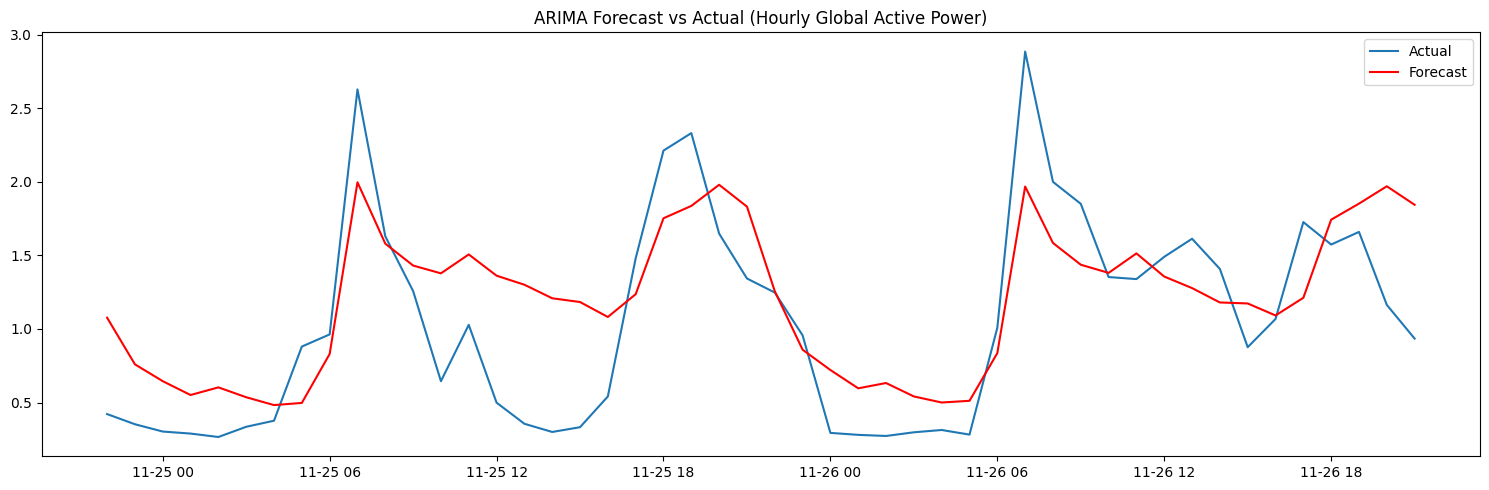

In [65]:
#Forecasting
forecast = model_fit.forecast(steps=len(test))

plt.figure(figsize=(15,5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual (Hourly Global Active Power)')
plt.legend()
plt.tight_layout()
plt.show()